# Analysis on Application Data
<b>Instruction - "application_data.csv" file used in this assignment should be placed in the same folder from where this jupyter notebook will be run.

In [16]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [17]:
#Importing NEcessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)

In [18]:
#reading files related to current application 
curapp=pd.read_csv("application_data.csv")

In [19]:
#helper function to find the missing value percentage in a given dataframe
def missingvalues(df):
    missdf=pd.DataFrame()
    missdf["Missing Percentage"]=100*df.loc[:,:].isnull().sum()/len(df.index)
    return missdf
#Function to plot a countplot/frequency plot of a categorical variable
def unicountplot(df,rot=0):
    plt.figure(figsize=(10,5))#Setting figure Size
    ax=sns.countplot(df)#Potting countplot using seaborn
    total=len(df.index)#finding number of rows to calculate percentages
    #For loop to annotate the countplot
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height + 3,str(round(100*height/total,2))+"%", ha="center") 
    #rot is aflag variable when it is 1 it means we want to rotate labels on x axis
    if rot==1:
        plt.xticks(rotation=45,horizontalalignment="right")
    plt.show()
#Function to plot box plot.The function plots two boxplots.First one on a normal scale and second one on a log scale
def uniboxplot(df):
    plt.figure(figsize=(15,5))
    #Plotting subplot 1
    plt.subplot(1,2,1)
    #Plotting Boxplot
    sns.boxplot(y=df)
    #Setting X label
    plt.xlabel(list(df.columns)[0])
    #Adjusting x label rotation and alignment
    plt.xticks(rotation=45,horizontalalignment="right")
    #plotting subplot2
    plt.subplot(1,2,2)
    #Setting X label
    plt.xlabel(list(df.columns)[0])
    #Setting title for the chart
    plt.title("Log Scale Representation")
    #plotting boxplot
    sns.boxplot(y=df)
    #Setting y scale to log
    plt.yscale("log")
    plt.xticks(rotation=45,horizontalalignment="right")
    plt.show()


In [20]:
#Function to analyse categorical columns.
#The function splits the given column into two dataframe one for target0 and one for target 1.
#Then it plots a barplot for each target variabls
def catanalysis(df,col,rot=0):
    #Setting figuresize
    plt.figure(figsize=(15,5))
    #calculating the count of values of given column in original dataframe 
    orig=df[col].value_counts()
    #Spliting the original data frame into two onw for target 0 and one for target 1
    target1=100*df.loc[df.TARGET==1,col].value_counts()/orig
    target0=100*df.loc[df.TARGET==0,col].value_counts()/orig
    plt.subplot(121)
    #Setting title
    plt.title("Percentage plot for Defaulters")
    ax=sns.barplot(x=list(target1.keys()),y=list(target1.values))
    #Annotating bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height,str(round(height,2))+"%", ha="center")
   #Setting xlabel
    plt.xlabel(col)
    #Setting ylabel
    plt.ylabel("Percentage values")
    #rot is a flag variable when its value is one it rotates the x labels by 45 degree.
    #We made this to prevent labels from overlaping.1 indicates we want to rotate labels
    if rot==1:
        plt.xticks(rotation=45,horizontalalignment="right")
    plt.subplot(122)
    #Setting title
    plt.title("Percentage plot for Non_Defaulters")
    ax=sns.barplot(x=list(target0.keys()),y=list(target0.values))
    #Annotating bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,height,str(round(height,2))+"%", ha="center")
    #Setting x label
    plt.xlabel(col)
    #rot is a flag variable when its value is one it rotates the x labels by 45 degree.
    #We made this to prevent labels from overlaping.1 indicates we want to rotate labels
    if rot==1:
        plt.xticks(rotation=45,horizontalalignment="right")
    #Setting ylabel
    plt.ylabel("Percentage values")


In [21]:
#Helper function to check outliers and treat outliers
#We have calculated upperbound and lowerbound using interquartile distance to check which numbers are outliers.
def checkoutliers(d,col):
    #Calculating first and third quartile
    q1,q3=np.nanpercentile(d.loc[:,col],[25,75])
    #interquartile distance difference of first and third quartile
    iqd=q3-q1
    #calculating lower bound
    lowerbound=q1-1.5*iqd
    #Calculating upper bound
    upperbound=q3+1.5*iqd
    #Temporary data frame to store our results
    temp=pd.DataFrame()
    #Checking which numbers are present outside upper and lower bound.These values are outliers.
    temp=d.loc[(d[col]>upperbound) | (d[col]<lowerbound),col]
    #first we isolated a list of values which are outliers then we stored those values in a set to eliminate duplicate values
    #Once we have all unique values we converted the data type to list and returned it
    return list(set(temp.values))
#Function to treat outliers
#The function works on same principle as shown above
def treatoutlier(d,col):
    q1,q3=np.nanpercentile(d[col],(25,75))
    iqd=q3-q1
    upperbound=q3+1.5*iqd
    lowerbound=q1-1.5*iqd
    #Return a dataframe which have all values between upper and lower bound
    temp=d.loc[(d[col]>=lowerbound) & (d[col]<=upperbound),col]
    return temp

In [22]:
#This function helps us to dril down on two categorical variables and analyse the target column
#The function first groups the dataframe deflt based on values of col 1 then it again groups those values based on col2
def bicatanalysis(deflt,col1,col2,s):
    #Creating a temporary dataframe and copying values of col1 and col2
    temp=deflt.loc[:,[col1,col2]]
    #Grouping the temp dataframe based on col1 and col2.
    #We have used size aggregate function because col1,col2 are categorical columns
    k=temp.groupby([col1,col2]).size()
    #Grouping the original dataframe and seeing the count of values.
    #This is done for percentage calculation purposes
    k1=df.groupby(col1).size()
    #Dataframe which will contain final values to be plotted
    j=pd.DataFrame()
    #Count column will contain percentage values of col2 based on count of values of original dataframe
    j["Count"]=100*k/k1
    #Resetting index since we have formed dataframe from group by it has multilevel indexex
    j=j.reset_index(level=[0,1])
    #Plotting
    ax=sns.barplot(x=j[col1],y=j["Count"],hue=j[col2])
    #Annotating values
    for p in ax.patches:
        if float(p.get_height()) > 0:
            height = p.get_height()
        else:
            height = .00000001
        ax.text(p.get_x()+p.get_width()/2.,
            height ,
            '{:1.2f}'.format(height)+"%",
            ha="center") 
    #Setting xlabels alignment
    plt.xticks(rotation=45,horizontalalignment="right")
    #Setting Title
    plt.title("Plot for "+s)
    #Settting ylabel
    plt.ylabel("Percentage Values")
    

<h1>Working with application_data.csv

<h3>Checking Data Structure of the dataframe

In [23]:
#Taking glimpse of data
curapp.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [24]:
#Seeing values of dataframe columns
curapp.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [25]:
#Checking structure of dataframe and datatype of different columns 
curapp.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                   

<h3>Inferences</h3>
From observing the above data we have come to the following conclusions
<ul><li>Column SK_ID_CURR is of type int which doesnt make sense.Although it contains only integer values but we cannot perform any numerical operation on them thus we should convert its data type to string </li><li>There are some columns like CODE_GENDER,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE which are of type object.Such columns are best described as categorical columns rather than string.</li><li>The type of most of the Flag variables is int which is good because then we can use them for calculations more easily we can classify them as categorical but we think its best to leave them as int. </li><li>Columns like WEEKDAY_APPR_PROCESS_START need change in data type they must be classified as ordered categorical variables. </li></ul>

<h3>Checking Missing values in columns and dealing with them

In [26]:
#Creating a data frame with all column names and missing value percentages
missingdf=pd.DataFrame()
missingdf["Percentage Missing Values"]=100*curapp.loc[:,:].isnull().sum()/len(curapp.index)


In [27]:
#Showing only those columns that have some missing values and sorting them in descending order
missingdf.loc[missingdf.loc[:,"Percentage Missing Values"]>0].sort_values(by="Percentage Missing Values",ascending=False)

,Percentage Missing Values
COMMONAREA_MEDI,69.872297
COMMONAREA_AVG,69.872297
COMMONAREA_MODE,69.872297
NONLIVINGAPARTMENTS_MEDI,69.432963
NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_AVG,69.432963
FONDKAPREMONT_MODE,68.386172
LIVINGAPARTMENTS_MODE,68.354953
LIVINGAPARTMENTS_MEDI,68.354953
LIVINGAPARTMENTS_AVG,68.354953


In [28]:
#Showing all columns which have 50% greater missing values in descending order
missingdf.loc[missingdf.loc[:,"Percentage Missing Values"]>50].sort_values(by="Percentage Missing Values",ascending=False)

,Percentage Missing Values
COMMONAREA_AVG,69.872297
COMMONAREA_MEDI,69.872297
COMMONAREA_MODE,69.872297
NONLIVINGAPARTMENTS_MEDI,69.432963
NONLIVINGAPARTMENTS_AVG,69.432963
NONLIVINGAPARTMENTS_MODE,69.432963
FONDKAPREMONT_MODE,68.386172
LIVINGAPARTMENTS_MEDI,68.354953
LIVINGAPARTMENTS_AVG,68.354953
LIVINGAPARTMENTS_MODE,68.354953


In [29]:
#Showing all columns who have missing values between (0 ,15] percent
missingdf.loc[(missingdf.loc[:,"Percentage Missing Values"]<15) & (missingdf.loc[:,"Percentage Missing Values"]>0)].sort_values(by="Percentage Missing Values",ascending=False)

,Percentage Missing Values
AMT_REQ_CREDIT_BUREAU_HOUR,13.501631
AMT_REQ_CREDIT_BUREAU_DAY,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
AMT_REQ_CREDIT_BUREAU_MON,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,13.501631
AMT_REQ_CREDIT_BUREAU_YEAR,13.501631
NAME_TYPE_SUITE,0.420148
OBS_30_CNT_SOCIAL_CIRCLE,0.332021
DEF_30_CNT_SOCIAL_CIRCLE,0.332021
OBS_60_CNT_SOCIAL_CIRCLE,0.332021


<h3>Handling Missing values strategy

There are 40 columns with high percentage of missing values(>50).We can deal with them in the following ways.<ul><li>Get more data,explore and try to fill those missing values with actual data.</li><li>We refrain from imputing values based on existing data because it may lead to data distortion.While imputing values to such high degree we would just be adding noise to the data which can significantly affect the results </li><li>Drop the columns.Since the columns have very high missing value percentage they are less likely to give us an acurate results.So it is better to drop them</li> <li>In our case since we dont have any alternative data source we have decided to drop all columns whose missing value percentage is greater than 50</li><ul> 

In [30]:
#The less50 variable contains list of column names which have less than 50% missing values
less50=list(missingdf.loc[missingdf.loc[:,"Percentage Missing Values"]<50].index)

In [31]:
#Dropping all the columns with high missing value percentage
curapp=curapp.loc[:,less50]

In [32]:
curapp.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Now we have to deal with columns with low missing percentage values(<15).We can use the following methods to deal with it.<ul><li>Do not impute those values.Let them as it is and try to exclude them from the calculation.This way we can fill those values with actual data at a later time</li><li>We can use mean or median to impute missing values.In some cases we may use specific number to fill up the missing values like 0,1 etc.</li><li>There is no fixed approach to impute missing values.The approach may differ from person to person and column to column</li></ul>

Now we will see some examples on how to handle missing values

Example 1 
AMT_ANNUITY
Numerical Column

In [33]:
#Looking at data distribution
#Since there is significant difference between mean and median this shows presence of outliers
curapp.loc[:,["AMT_ANNUITY"]].describe()

,AMT_ANNUITY
count,307499.000000
mean,27108.573909
std,14493.737315
min,1615.500000
25%,16524.000000
50%,24903.000000
75%,34596.000000
max,258025.500000


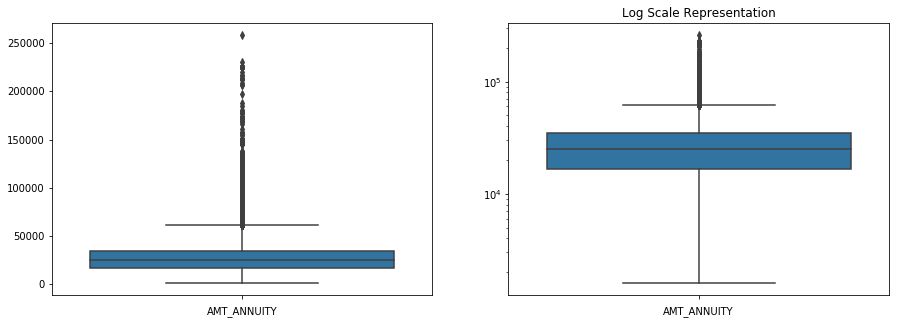

In [34]:
#Plotting boxplot to see outliers
#From boxplot it is clear that there are significant number of outliers present in the data
uniboxplot(curapp.loc[:,["AMT_ANNUITY"]])

The above description show presence of outliers which means we cannot impute missing vaues with mean as mean is highly afected by outliers.We have the following options to choose from for imputing values.<ul><li>Impute the missing values with median since it is not affected by outliers</li><li>We can remove the outliers and then impute the missing values with mean</li></ul>

Example 2 NAME_TYPE_SUITE

In [35]:
curapp.loc[:,"NAME_TYPE_SUITE"].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [36]:
#NAME_TYPE_SUITE is of data typestring but we think it will be more appropriate to change its data type
#to unordered categorical variable
curapp["NAME_TYPE_SUITE"]=curapp["NAME_TYPE_SUITE"].astype('category')
curapp["NAME_TYPE_SUITE"].dtype

CategoricalDtype(categories=['Children', 'Family', 'Group of people', 'Other_A',
                  'Other_B', 'Spouse, partner', 'Unaccompanied'],
                 ordered=False)

In [37]:
curapp.loc[:,"NAME_TYPE_SUITE"].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

The column NAME_TYPE_SUITE is a categorical column so we have following options to choose for imputing missing values.
<ul><li>We can impute missing value with the most frequent value.In our case it is "Unaccompained"</li><li>We can introduce a new value called "Unknown" to mark that this value is not known so that we can change it after getting additional data.</li></ul>

Example 3 CNT_FAM_MEMBERS	

In [38]:
curapp.loc[:,"CNT_FAM_MEMBERS"].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [39]:
curapp.loc[:,"CNT_FAM_MEMBERS"].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

The column CNT_FAM_MEMBERS is a numerical column with discrete values.So we cannot impute missing values with mean.The most sensible choice would be to impute the missing values with 2 as it has maximum frequency

Example 4 AMT_REQ_CREDIT_BUREAU_HOUR

In [40]:
curapp.loc[:,"AMT_REQ_CREDIT_BUREAU_HOUR"].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [41]:
curapp.loc[:,"AMT_REQ_CREDIT_BUREAU_HOUR"].value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

The column AMT_REQ_CREDIT_BUREAU_HOUR is a numerical column with discrete values.So we cannot impute missing values with mean.The most sensible choice would be to impute the missing values with 0 as it has maximum frequency

Example 5 AMT_GOODS_PRICE

In [42]:
curapp.loc[:,"AMT_GOODS_PRICE"].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

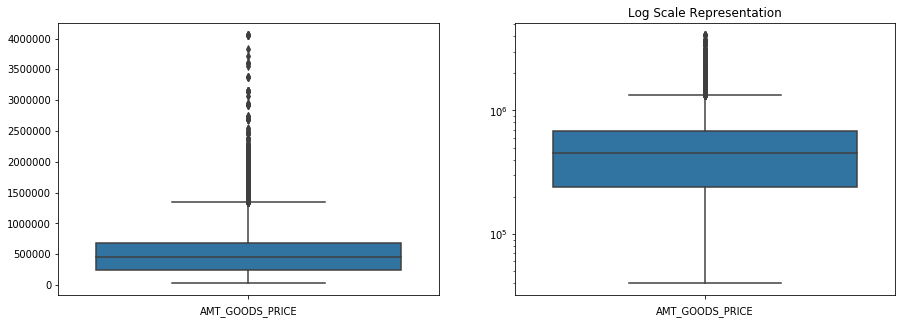

In [43]:
uniboxplot(curapp.loc[:,["AMT_GOODS_PRICE"]])

Upon observing boxplot and mean and median of the data we know that data has outliers which means we cannot impute missing vaues with mean .We have the following options to choose from for imputing values.<ul><li>Impute the missing values with median since it is not affected by outliers</li><li>We can remove the outliers and then impute the missing values with mean</li></ul>

<h3>Note</h3>
    Based on our understanding we have selected some columns and we would be doing our analysis on those columns only. 

In [44]:
#Contains a list of columns which we deemed important
listcol=["SK_ID_CURR",
"TARGET",
"NAME_CONTRACT_TYPE",
"CODE_GENDER",
"FLAG_OWN_CAR",
"FLAG_OWN_REALTY",
"CNT_CHILDREN",
"AMT_INCOME_TOTAL",
"AMT_CREDIT",
"AMT_ANNUITY",
"AMT_GOODS_PRICE",
"NAME_TYPE_SUITE",
"NAME_INCOME_TYPE",
"NAME_EDUCATION_TYPE",
"NAME_FAMILY_STATUS",
"NAME_HOUSING_TYPE",
"DAYS_BIRTH",
"OCCUPATION_TYPE",
"CNT_FAM_MEMBERS",
"WEEKDAY_APPR_PROCESS_START",
"HOUR_APPR_PROCESS_START",
"ORGANIZATION_TYPE",
"OBS_60_CNT_SOCIAL_CIRCLE",
"DEF_60_CNT_SOCIAL_CIRCLE",
"AMT_REQ_CREDIT_BUREAU_QRT"]

In [45]:
#Copying only required columns in a dataframe
df=curapp.loc[:,listcol]
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_QRT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,Laborers,1.0,WEDNESDAY,10,Business Entity Type 3,2.0,2.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,-16765,Core staff,2.0,MONDAY,11,School,1.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,Laborers,1.0,MONDAY,9,Government,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,Laborers,2.0,WEDNESDAY,17,Business Entity Type 3,2.0,0.0,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,Core staff,1.0,THURSDAY,11,Religion,0.0,0.0,0.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 25 columns):
SK_ID_CURR                    307511 non-null int64
TARGET                        307511 non-null int64
NAME_CONTRACT_TYPE            307511 non-null object
CODE_GENDER                   307511 non-null object
FLAG_OWN_CAR                  307511 non-null object
FLAG_OWN_REALTY               307511 non-null object
CNT_CHILDREN                  307511 non-null int64
AMT_INCOME_TOTAL              307511 non-null float64
AMT_CREDIT                    307511 non-null float64
AMT_ANNUITY                   307499 non-null float64
AMT_GOODS_PRICE               307233 non-null float64
NAME_TYPE_SUITE               306219 non-null category
NAME_INCOME_TYPE              307511 non-null object
NAME_EDUCATION_TYPE           307511 non-null object
NAME_FAMILY_STATUS            307511 non-null object
NAME_HOUSING_TYPE             307511 non-null object
DAYS_BIRTH                    307511 n

We carefully observed Data types of all the columns and we came to following conclusions
<ol><li>There are columns like CODE_GENDER,NAME_TYPE_SUITE,OCCUPATION_TYPE which are of type string we think they will better serve as categorical columns.Since they can be regarded categories on which we can classiy our data  </li>
<li>The column SK_ID_CURRENT is of int type which doesn't make any sense.It is true that it contains only numerical columns but we cannot perform any numerical operation on them so we are converting its data type to string </li><li>Columns like WEEKDAY_APPR_PROCESS_START and HOUR_APPR_PROCESS_START are of type string but they should be of type ordered categorical. </li><li>We also say that the flag variables like FLAG_OWN_CAR,FLAG_OWN_REALITY are of type string because they contain values Y,N but just for our comfort and ease in analysis we have changed their data type to int.Y is converted to 1 whereas N is converted 0</li></ol>

Making changes as mentioned above

In [47]:
#List of columns to convert to category type unordered
coltoconvert=[
"NAME_CONTRACT_TYPE",
"CODE_GENDER",
"NAME_TYPE_SUITE",
"NAME_INCOME_TYPE",
"NAME_EDUCATION_TYPE",
"NAME_FAMILY_STATUS",
"NAME_HOUSING_TYPE",
"OCCUPATION_TYPE","ORGANIZATION_TYPE"]
df.loc[:,coltoconvert]=df.loc[:,coltoconvert].astype('category')
#Converting data type of SK_ID_CURR to string
df.loc[:,"SK_ID_CURR"]=df.loc[:,"SK_ID_CURR"].astype("str")

In [48]:
#changing data type to ordered category since that makes more sense than keeping it a int type
df["HOUR_APPR_PROCESS_START"]=df["HOUR_APPR_PROCESS_START"].astype('category',ordered=True) 
df["WEEKDAY_APPR_PROCESS_START"]=df["WEEKDAY_APPR_PROCESS_START"].astype('category',ordered=True) 

In [49]:
#Changing data type and value of flag variables.
#The flag variables contained values Y and N.For our convenience we have changed Y to 1 and N to 0.
#Thus we have change the data type to int
df.loc[:,"FLAG_OWN_CAR"]=df.loc[:,"FLAG_OWN_CAR"].apply(lambda x: 1 if x=="Y"  else  0)
df.loc[:,"FLAG_OWN_REALTY"]=df.loc[:,"FLAG_OWN_REALTY"].apply(lambda x: 1 if x=="Y"  else  0)

<h4>Remark</h4>
The DAYS_BIRTH column has negative values.Although days cannot be negative but this is our understanding that the negative value is because the data source from where the data has been retrieved might have calculated it by subtracting it from the current date.

<b>Why negative sign is important?</b><br>
We think the negative sign in days column can work to an advantage.There are number of column which contain number of days like when the loan application expired etc. The sign indicates whether it is a coming date or the date has passed.Thus we think the sign + and - in the DAYS_BIRTH column can prove useful in calculating dates thus preventing any confusion.

But since we as human beings cannot infer much data from number of days thus we have created a new column called AGE

In [50]:
#Creating a New column Age
df["AGE"]=df["DAYS_BIRTH"].apply(lambda x:round(abs(x/365)))

In [51]:
#Analysing dataframe after conversion 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 26 columns):
SK_ID_CURR                    307511 non-null object
TARGET                        307511 non-null int64
NAME_CONTRACT_TYPE            307511 non-null category
CODE_GENDER                   307511 non-null category
FLAG_OWN_CAR                  307511 non-null int64
FLAG_OWN_REALTY               307511 non-null int64
CNT_CHILDREN                  307511 non-null int64
AMT_INCOME_TOTAL              307511 non-null float64
AMT_CREDIT                    307511 non-null float64
AMT_ANNUITY                   307499 non-null float64
AMT_GOODS_PRICE               307233 non-null float64
NAME_TYPE_SUITE               306219 non-null category
NAME_INCOME_TYPE              307511 non-null category
NAME_EDUCATION_TYPE           307511 non-null category
NAME_FAMILY_STATUS            307511 non-null category
NAME_HOUSING_TYPE             307511 non-null category
DAYS_BIRTH                 

<h3>Treating Numerical columns</h3>.
Now we will check data quality of the numerical columns in our data set.It will contain  the following things <ul><li>Check data distribution of the column</li><li>Identify the outliers.</li></ul>

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 26 columns):
SK_ID_CURR                    307511 non-null object
TARGET                        307511 non-null int64
NAME_CONTRACT_TYPE            307511 non-null category
CODE_GENDER                   307511 non-null category
FLAG_OWN_CAR                  307511 non-null int64
FLAG_OWN_REALTY               307511 non-null int64
CNT_CHILDREN                  307511 non-null int64
AMT_INCOME_TOTAL              307511 non-null float64
AMT_CREDIT                    307511 non-null float64
AMT_ANNUITY                   307499 non-null float64
AMT_GOODS_PRICE               307233 non-null float64
NAME_TYPE_SUITE               306219 non-null category
NAME_INCOME_TYPE              307511 non-null category
NAME_EDUCATION_TYPE           307511 non-null category
NAME_FAMILY_STATUS            307511 non-null category
NAME_HOUSING_TYPE             307511 non-null category
DAYS_BIRTH                 

<h2>How we discovered outliers ?</h2>

<ol><li>We first used a box plot to check the presence of outliers in our data.</li><li>To find exact values we used interquartile distance method. </li><li>We first calculated interquartile distance which is given as difference of 75 and 25 percentile.</li><li>Once we calculated the IQD we used it to calculate a upper and lower bound.<ul><li>Upperbound=q3+1.5*IQD</li><li>Lowerbound=q1-1.5*IQD</li></ul></li><li>Any value that does not lie in range [Lowerbound,Upperbound] is considered an outlier.</li></ol>

<b>Checking column AMT_INCOME_TOTAL

In [53]:
#Large Difference between mean value and median value indicates presence of outliers
df.loc[:,["AMT_INCOME_TOTAL"]].describe()

,AMT_INCOME_TOTAL
count,3.075110e+05
mean,1.687979e+05
std,2.371231e+05
min,2.565000e+04
25%,1.125000e+05
50%,1.471500e+05
75%,2.025000e+05
max,1.170000e+08


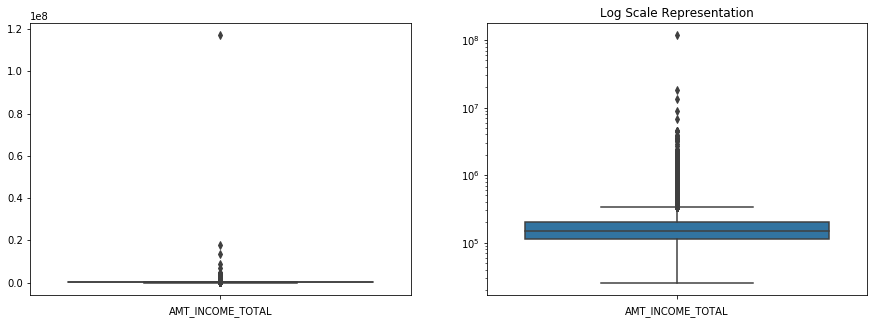

In [54]:
#Plotting boxplots to check presence of outliers
#It can be clearly seen from box plot that the variable has very high number of outliers
uniboxplot(df.loc[:,["AMT_INCOME_TOTAL"]])

In [55]:
#Calling helper function to identify outliers
checkoutliers(df,"AMT_INCOME_TOTAL")

[708610.5,
 360450.0,
 466956.0,
 479250.0,
 495634.5,
 378900.0,
 639000.0,
 426019.5,
 376875.0,
 616500.0,
 360508.5,
 936000.0,
 415813.5,
 354375.0,
 434250.0,
 594000.0,
 1575000.0,
 1235038.5,
 352350.0,
 411750.0,
 571500.0,
 389250.0,
 549000.0,
 1530000.0,
 366750.0,
 346275.0,
 526500.0,
 395433.0,
 385200.0,
 3150000.0,
 350392.5,
 344250.0,
 704700.0,
 504000.0,
 403650.0,
 1306831.5,
 422100.0,
 374998.5,
 18000090.0,
 481500.0,
 381150.0,
 690399.0,
 2214117.0,
 340200.0,
 459000.0,
 1440000.0,
 436495.5,
 356625.0,
 436500.0,
 1417500.0,
 416029.5,
 756000.0,
 354600.0,
 348462.0,
 414000.0,
 573750.0,
 377145.0,
 733500.0,
 555327.0,
 682303.5,
 342337.5,
 391500.0,
 414031.5,
 711000.0,
 364891.5,
 1001826.0,
 369000.0,
 1350000.0,
 688500.0,
 346500.0,
 489861.0,
 666000.0,
 424350.0,
 362911.5,
 1305000.0,
 383400.0,
 514480.5,
 381375.0,
 1282500.0,
 360900.0,
 621000.0,
 438750.0,
 1260000.0,
 338400.0,
 373230.0,
 356850.0,
 576000.0,
 475650.0,
 494100.0,
 39375

In [56]:
#Treating outliers
df["AMT_INCOME_TOTAL"]=treatoutlier(df,"AMT_INCOME_TOTAL")

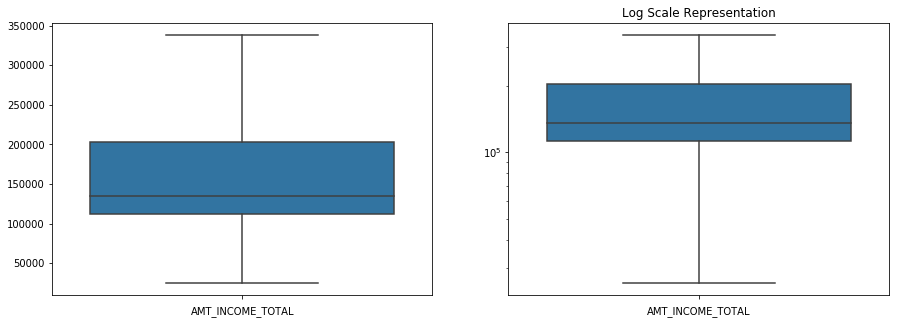

In [57]:
#Boxplot after treating outliers
uniboxplot(df.loc[:,["AMT_INCOME_TOTAL"]])

In [58]:
df.loc[:,["AMT_INCOME_TOTAL"]].describe()

,AMT_INCOME_TOTAL
count,293476.000000
mean,154263.935956
std,64014.949755
min,25650.000000
25%,112500.000000
50%,135000.000000
75%,202500.000000
max,337500.000000


<h3>Insights</h3>
<ol><li>The outliers have been treated successfully as it is evident from the boxplot</li><li>The boxplot shows that most of the data is concentrated between 1,20,000-2,20,000</li><li>Minimum value of AMT_INCOME_TOTAl is 25650 wheraeas maximum value is 337500</li><li>The thickness of the boxplot suggest that data distribution is not very wide i.e data is not spread over a large range.</li></ol>

<b>Checking Column AMT_CREDIT

In [59]:
#Significant Difference between mean value and median value indicates presence of outliers
df.loc[:,["AMT_CREDIT"]].describe()

,AMT_CREDIT
count,3.075110e+05
mean,5.990260e+05
std,4.024908e+05
min,4.500000e+04
25%,2.700000e+05
50%,5.135310e+05
75%,8.086500e+05
max,4.050000e+06


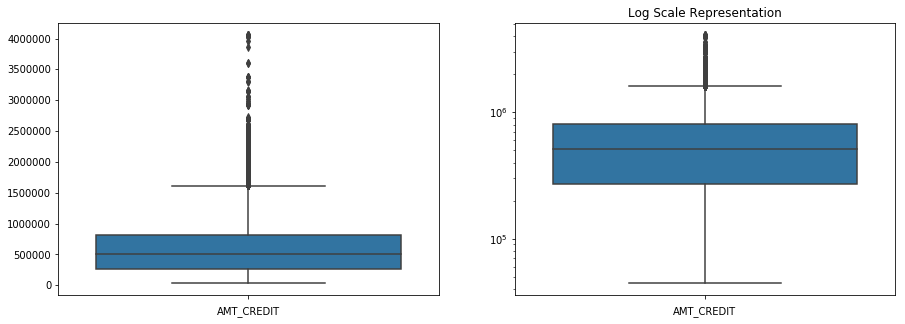

In [60]:
#Plotting boxplots to check presence of outliers
#It can be clearly seen from box plot that the variable has very high number of outliers
uniboxplot(df.loc[:,["AMT_CREDIT"]])

In [61]:
#Calling helper function to identify outliers
checkoutliers(df,"AMT_CREDIT")

[1941507.0,
 1642500.0,
 1632262.5,
 1783818.0,
 1962000.0,
 1626133.5,
 2281500.0,
 1880095.5,
 1620000.0,
 2404386.0,
 2031651.0,
 1671210.0,
 1939500.0,
 2230326.0,
 1988667.0,
 1626174.0,
 1747008.0,
 1966144.5,
 2140227.0,
 1660999.5,
 1773639.0,
 2017354.5,
 1808460.0,
 1902672.0,
 2078802.0,
 1650771.0,
 1673307.0,
 1730655.0,
 2463840.0,
 1876068.0,
 1894500.0,
 2214000.0,
 2125953.0,
 1626241.5,
 1689736.5,
 2406537.0,
 1876108.5,
 2164878.0,
 2044048.5,
 1802385.0,
 1681555.5,
 1923219.0,
 1675413.0,
 1849500.0,
 1714338.0,
 2169000.0,
 3150000.0,
 2173108.5,
 1827000.0,
 2183355.0,
 1663164.0,
 1816767.0,
 2146500.0,
 1857735.0,
 1673415.0,
 1718473.5,
 1700050.5,
 1804500.0,
 2285784.0,
 1745113.5,
 1919196.0,
 2341089.0,
 2220259.5,
 1978596.0,
 1906920.0,
 1736937.0,
 1720552.5,
 1782000.0,
 2021625.0,
 2142459.0,
 1655037.0,
 2085120.0,
 1882372.5,
 2027781.0,
 1855755.0,
 1759500.0,
 2326797.0,
 1724688.0,
 1798416.0,
 1741077.0,
 2124054.0,
 1757466.0,
 1626394.5,
 233

In [62]:
#Treating outliers
df["AMT_CREDIT"]=treatoutlier(df,"AMT_CREDIT")

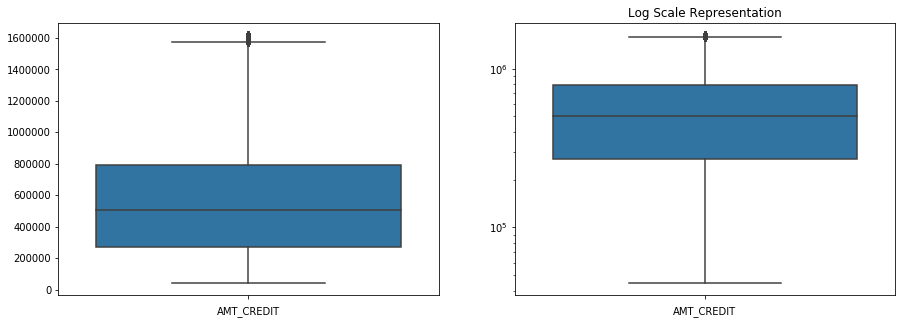

In [63]:
#Boxplot after treating outliers
uniboxplot(df.loc[:,["AMT_CREDIT"]])

In [64]:
df.loc[:,["AMT_CREDIT"]].describe()

,AMT_CREDIT
count,3.009490e+05
mean,5.699786e+05
std,3.527292e+05
min,4.500000e+04
25%,2.700000e+05
50%,5.056650e+05
75%,7.908300e+05
max,1.616278e+06


<h3>Insights</h3>
<ol><li>The outliers have been treated successfully as it is evident from the boxplot.However there are still some values which can be considered as outliers this suggest we need to fine tune our outlier detection and treatment method.</li><li>The boxplot shows that most of the data is concentrated between 270000-790000</li><li>Minimum value of AMT_CREDIT is 45000 wheraeas maximum value is 1616278</li><li>The thickness of the boxplot suggest that data distribution is not very wide i.e data is not spread over a large range.</li><li>The distance of the upper wisker from second quartile indicates that maximum value is differes largely from general distribution.</li><li>The short distance of lower wisker from second quartile indicates minimum value does not vary largely from general data distribution</li></ol>

<b>Checking column AMT_ANNUITY

In [65]:
#Difference between mean value and median value indicates there are outliers
df.loc[:,["AMT_ANNUITY"]].describe()

,AMT_ANNUITY
count,307499.000000
mean,27108.573909
std,14493.737315
min,1615.500000
25%,16524.000000
50%,24903.000000
75%,34596.000000
max,258025.500000


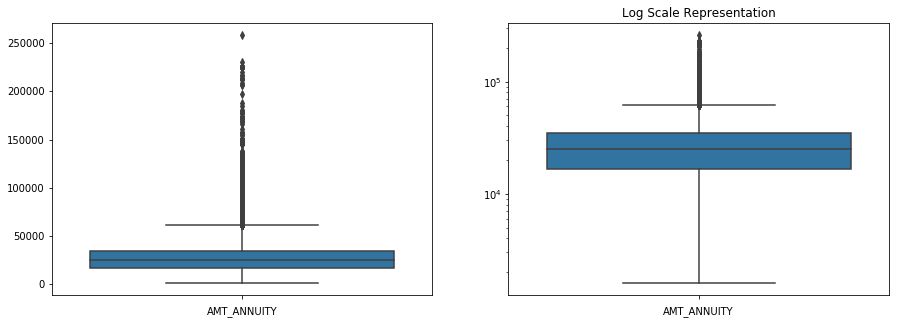

In [66]:
#Plotting boxplots to check presence of outliers
#It can be clearly seen from box plot that the variable has very high number of outliers
uniboxplot(df.loc[:,["AMT_ANNUITY"]])

In [67]:
#Calling helper function to identify outliers
checkoutliers(df,"AMT_ANNUITY")

[73728.0,
 81922.5,
 98307.0,
 73732.5,
 90117.0,
 81931.5,
 65547.0,
 65556.0,
 65560.5,
 98338.5,
 106533.0,
 65578.5,
 65583.0,
 65587.5,
 65592.0,
 73786.5,
 65596.5,
 65601.0,
 73800.0,
 81994.5,
 98379.0,
 65614.5,
 81999.0,
 82003.5,
 106582.5,
 65623.5,
 73818.0,
 73822.5,
 98401.5,
 82021.5,
 82035.0,
 73845.0,
 90229.5,
 65664.0,
 73863.0,
 90261.0,
 82075.5,
 73885.5,
 65704.5,
 213160.5,
 73903.5,
 73908.0,
 65718.0,
 98487.0,
 73912.5,
 73917.0,
 65731.5,
 114885.0,
 65736.0,
 65740.5,
 73935.0,
 73944.0,
 98523.0,
 73948.5,
 65758.5,
 73953.0,
 73957.5,
 82152.0,
 73962.0,
 65772.0,
 73966.5,
 73971.0,
 82165.5,
 73980.0,
 82206.0,
 65826.0,
 90409.5,
 213291.0,
 65835.0,
 74047.5,
 106816.5,
 90436.5,
 98631.0,
 65866.5,
 98640.0,
 65875.5,
 106839.0,
 180576.0,
 65889.0,
 74083.5,
 65893.5,
 82282.5,
 74092.5,
 65902.5,
 115056.0,
 65907.0,
 74101.5,
 65911.5,
 74110.5,
 65920.5,
 98689.5,
 82309.5,
 65925.0,
 74124.0,
 74128.5,
 123282.0,
 65943.0,
 65956.5,
 65961.0,


In [68]:
#Treating outliers
df["AMT_ANNUITY"]=treatoutlier(df,"AMT_ANNUITY")

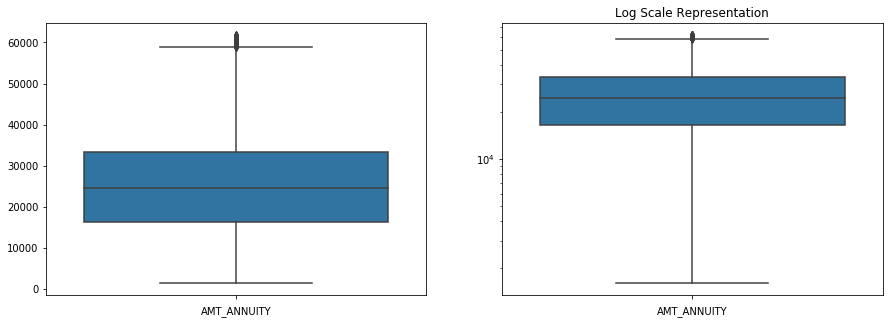

In [69]:
#Boxplot after treating outliers
uniboxplot(df.loc[:,["AMT_ANNUITY"]])

In [70]:
df.loc[:,["AMT_ANNUITY"]].describe()

,AMT_ANNUITY
count,299995.000000
mean,25924.594397
std,12229.934543
min,1615.500000
25%,16359.750000
50%,24543.000000
75%,33408.000000
max,61699.500000


<h3>Insights</h3>
<ol><li>The outliers have been treated successfully as it is evident from the boxplot.However there are still some values which can be considered as outliers this suggest we need to fine tune our outlier detection method.</li><li>The boxplot shows that most of the data is concentrated between 16000-24000</li><li>Minimum value of AMT_CREDIT is 1615 wheraeas maximum value is 61699</li><li>The thickness of the boxplot suggest that data distribution is not very wide i.e data is not spread over a large range.</li><li>The distance of the upper wisker from second quartile indicates that maximum value is differes largely from general distribution.</li><li>The  distance of lower wisker from second quartile indicates minimum value also vary largely from general data distribution</li></ol>

<b>Checking column AMT_GOODS_PRICE

In [71]:
#Large Difference between mean value and median value indicates presence of outliers
df.loc[:,["AMT_GOODS_PRICE"]].describe()

,AMT_GOODS_PRICE
count,3.072330e+05
mean,5.383962e+05
std,3.694465e+05
min,4.050000e+04
25%,2.385000e+05
50%,4.500000e+05
75%,6.795000e+05
max,4.050000e+06


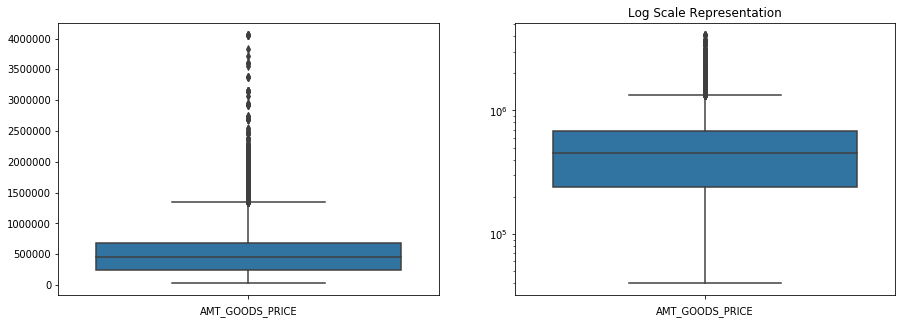

In [72]:
#Plotting boxplots to check presence of outliers
#It can be clearly seen from box plot that the variable has very high number of outliers
uniboxplot(df.loc[:,["AMT_GOODS_PRICE"]])

In [73]:
#Calling helper function to identify outliers
checkoutliers(df,"AMT_GOODS_PRICE")

[1728000.0,
 1642500.0,
 2218500.0,
 1639431.0,
 1557000.0,
 2133000.0,
 2047500.0,
 1471500.0,
 1386000.0,
 1439248.5,
 1962000.0,
 1791000.0,
 1705500.0,
 2281500.0,
 1620000.0,
 2196000.0,
 1534500.0,
 2110500.0,
 2025000.0,
 1449000.0,
 1363500.0,
 1939500.0,
 1854000.0,
 1768500.0,
 2114100.0,
 1683000.0,
 1597500.0,
 2173500.0,
 1512000.0,
 2002500.0,
 1426500.0,
 1917000.0,
 1831500.0,
 1746000.0,
 4050000.0,
 2236500.0,
 1660500.0,
 1575000.0,
 2151000.0,
 1415259.0,
 1489500.0,
 2065500.0,
 1980000.0,
 1404000.0,
 1805922.0,
 1894500.0,
 1474663.5,
 2961000.0,
 1809000.0,
 2385000.0,
 1723500.0,
 1638000.0,
 2214000.0,
 1552500.0,
 1677942.0,
 1467000.0,
 2043000.0,
 1381500.0,
 1957500.0,
 3600000.0,
 2448000.0,
 1786500.0,
 2362500.0,
 1701000.0,
 1615500.0,
 2191500.0,
 1530000.0,
 2106000.0,
 1444500.0,
 1359000.0,
 1935000.0,
 1849500.0,
 1764000.0,
 2340000.0,
 2254500.0,
 1678500.0,
 1593000.0,
 2169000.0,
 1996456.5,
 1458859.5,
 1507500.0,
 2745000.0,
 1422000.0,
 315

In [74]:
#Treating outliers
df["AMT_GOODS_PRICE"]=treatoutlier(df,"AMT_GOODS_PRICE")

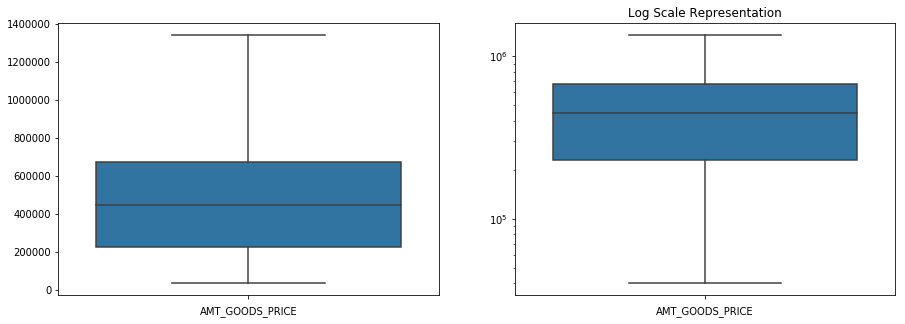

In [75]:
#Boxplot after treating outliers
uniboxplot(df.loc[:,["AMT_GOODS_PRICE"]])

In [76]:
df.loc[:,["AMT_GOODS_PRICE"]].describe()

,AMT_GOODS_PRICE
count,2.925050e+05
mean,4.869864e+05
std,2.905753e+05
min,4.050000e+04
25%,2.295000e+05
50%,4.500000e+05
75%,6.750000e+05
max,1.341000e+06


<h3>Insights</h3>
<ol><li>The outliers have been treated successfully.</li><li>The boxplot shows that most of the data is concentrated between 229500-675000</li><li>Minimum value of AMT_GOODS_PRICE is 40500 whereas maximum value is 1341000</li><li>The thickness of the boxplot suggest that data distribution is not very wide i.e data is not spread over a large range.</li><li>The distance of upper and lower wisker from second quartile shows that maximum value varies largely from the median of distribution when compared to minimum value of the distribution.</li></ol>

<b>Checking Column CNT_CHILDREN

In [77]:
#Since it is a discrete value variable we didnt get much insight from median and mean
df.loc[:,["CNT_CHILDREN"]].describe()

,CNT_CHILDREN
count,307511.000000
mean,0.417052
std,0.722121
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,19.000000


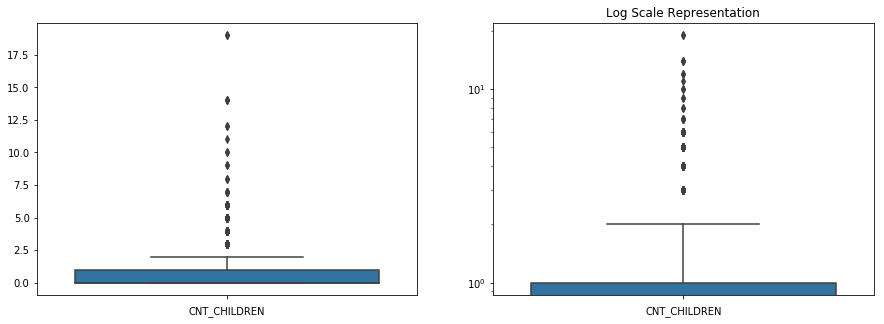

In [78]:
#Plotting boxplots to check presence of outliers
#It can be clearly seen from box plot that the variable has very high number of outliers
uniboxplot(df.loc[:,["CNT_CHILDREN"]])

In [79]:
df["CNT_CHILDREN"].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [80]:
#Calling helper function to identify outliers
checkoutliers(df,"CNT_CHILDREN")

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 19]

In [81]:
#Treating outliers
df["CNT_CHILDREN"]=treatoutlier(df,"CNT_CHILDREN")

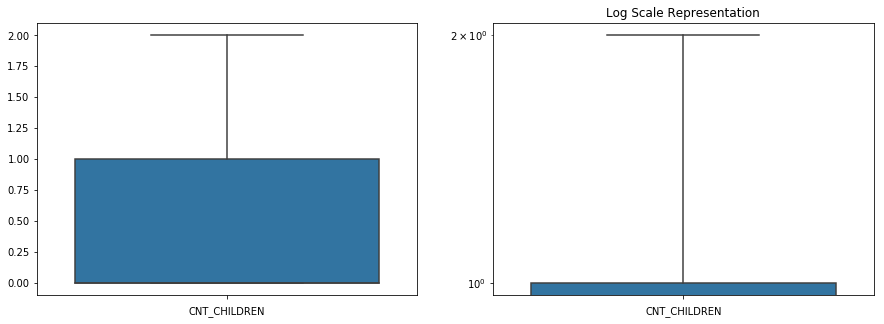

In [82]:
#Boxplot after treating outliers
uniboxplot(df.loc[:,["CNT_CHILDREN"]])

In [83]:
df.loc[:,["CNT_CHILDREN"]].describe()

,CNT_CHILDREN
count,303239.000000
mean,0.377976
std,0.641509
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


<h3>Insights</h3>
<ol><li>The outliers have been treated successfully.</li><li>The boxplot shows that most of the people have either 0 or 1 children</li><li>There are significant number of people which have 2 children</li></ol>

<h3>Binning some continuous variables

<b>Binning AGE column</b>
<ul><li>We have divided age gorups in three columns:Young,Middle_Age,Old</li><li>People with age less than 30 re considered Young.</li><li>People with age between 30-60 are classified as MIDDLE_AGE.</li><li>People having age above 60 are categorized as OLD</li></ul>

In [84]:
#Function to help bin age column
def agebin(x):
    #If age is less than 30 person is young
    if x<=30:
        return "YOUNG"
    #IF Age is greater then 30 but less than 60 person is MIDDLE_AGED
    if x>30 and x<=60:
        return "MIDDLE_AGE"
    #If Age is greater than 60 years person is old
    if x>60:
        return "OLD"
    else:
        return "Invalid Value"

In [85]:
#Binning column
df["AGE_CAT"]=df["AGE"].apply(agebin)

In [86]:
#Looking at binned data
df.loc[:,["AGE_CAT","AGE"]].head()

,AGE_CAT,AGE
0,YOUNG,26
1,MIDDLE_AGE,46
2,MIDDLE_AGE,52
3,MIDDLE_AGE,52
4,MIDDLE_AGE,55


<b>Binning AMT_INCOME_TOTAL Column

<ul><li>We have divided AMT_INCOME in three columns:UPPER_CLASS,MIDDLE_CLASS,LOWER_MIDDLE_CLASS,LOWER_CLASS</li><li>People with income less than 30,000  are considered LOWER_CLASS.</li><li>People with income between 30,000-60,000 are classified as LOWER_MIDDLE_CLASS.</li><li>People having income between 60,000 and 2,00,000 are categorized as MIDDLE_CLASS</li><li>People who earn more than 2,00,000 are classified as UPPER_CLASS</li></ul>

In [87]:
#Function to help bin age column
def incomebin(x):
    x=int(x)
    if x<=30000:
        return "LOWER_CLASS"
    if x>30000 and x<=60000:
        return "LOWER_MIDDLE_CLASS"
    if x>60000  and x<=200000:
        return "MIDDLE_CLASS"
    if x>200000:
        return "UPPER_CLASS"
    else:
        return "INVALID"

In [88]:
#Binning AMT_INCOME_TOTAL
df["FINANCIAL_CAT"]=df["AMT_INCOME_TOTAL"].dropna().apply(incomebin)

In [89]:
#LOOKING at data
df.loc[:,["FINANCIAL_CAT","AMT_INCOME_TOTAL"]].head()

,FINANCIAL_CAT,AMT_INCOME_TOTAL
0,UPPER_CLASS,202500.0
1,UPPER_CLASS,270000.0
2,MIDDLE_CLASS,67500.0
3,MIDDLE_CLASS,135000.0
4,MIDDLE_CLASS,121500.0


<h1>Analysis on Different Columns

<h3>Checking Data Imbalance for Target variable

In [90]:
#We have created a dictionary which contain count of values 0 and 1 in the dataframe
targetcount=dict(df["TARGET"].value_counts())

In [91]:
#Seeing values
targetcount

{0: 282686, 1: 24825}

In [92]:
#Calculating Imbalance ratio
imbalanceratio=targetcount[0]/targetcount[1]

In [93]:
#Imbalance ratio is about 11.3
imbalanceratio

11.387150050352467

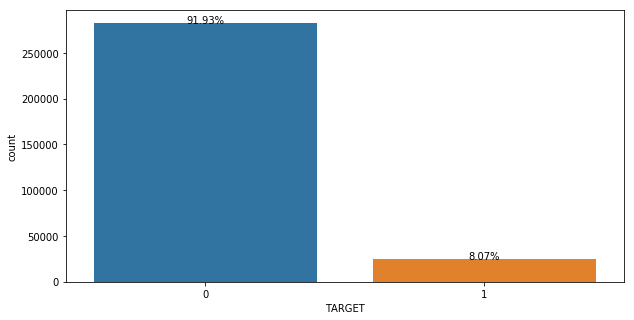

In [94]:
#Plotting a frequency plot to see data distribution of TARGET column
unicountplot(df.loc[:,"TARGET"])

<h3>Insights</h3>

<ul><li>We have found imbalance ratio as 11.38</li><li>The plot also shows that there is a significant imbalance in TARGET column</li></ul>

<h2>Approach</h2>
<ul><li>We will now divide the dataframe df into two data frames dfdefault and dfnotdefault.</li><li>These two data frames will contain data of defaulters and non defaulters respectively</li><li>Using these dataframes we will now try to see if there are any patterns between different variables and their effect on people defaulting their loan.</li><li>We will see which group of people are safe to grant a loan and which characteristics can say that person is likely to default on his/her loan</li></ul>

In [95]:
#Creating data frame for defaulter
#Target 1 says client has payment difficulties
dfdefault=df.loc[df.TARGET==1]
dfdefault.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_QRT,AGE,AGE_CAT,FINANCIAL_CAT
0,100002,1,Cash loans,M,0,1,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,Laborers,1.0,WEDNESDAY,10,Business Entity Type 3,2.0,2.0,0.0,26,YOUNG,UPPER_CLASS
26,100031,1,Cash loans,F,0,1,0.0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,-18724,Cooking staff,1.0,MONDAY,9,Business Entity Type 3,10.0,0.0,2.0,51,MIDDLE_AGE,MIDDLE_CLASS
40,100047,1,Cash loans,M,0,1,0.0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,-17482,Laborers,2.0,TUESDAY,9,Business Entity Type 3,0.0,0.0,0.0,48,MIDDLE_AGE,UPPER_CLASS
42,100049,1,Cash loans,F,0,0,0.0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-13384,Sales staff,2.0,THURSDAY,11,Self-employed,1.0,0.0,0.0,37,MIDDLE_AGE,MIDDLE_CLASS
81,100096,1,Cash loans,F,0,1,0.0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,-24794,NaN,2.0,THURSDAY,10,XNA,1.0,1.0,0.0,68,OLD,MIDDLE_CLASS


In [96]:
#Creating data frame for non defaulter
#Target 0 says client has no payment difficulties
dfnotdefault=df.loc[df.TARGET==0]
dfnotdefault.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_QRT,AGE,AGE_CAT,FINANCIAL_CAT
1,100003,0,Cash loans,F,0,0,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,-16765,Core staff,2.0,MONDAY,11,School,1.0,0.0,0.0,46,MIDDLE_AGE,UPPER_CLASS
2,100004,0,Revolving loans,M,1,1,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,Laborers,1.0,MONDAY,9,Government,0.0,0.0,0.0,52,MIDDLE_AGE,MIDDLE_CLASS
3,100006,0,Cash loans,F,0,1,0.0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,Laborers,2.0,WEDNESDAY,17,Business Entity Type 3,2.0,0.0,NaN,52,MIDDLE_AGE,MIDDLE_CLASS
4,100007,0,Cash loans,M,0,1,0.0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,Core staff,1.0,THURSDAY,11,Religion,0.0,0.0,0.0,55,MIDDLE_AGE,MIDDLE_CLASS
5,100008,0,Cash loans,M,0,1,0.0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,-16941,Laborers,2.0,WEDNESDAY,16,Other,0.0,0.0,1.0,46,MIDDLE_AGE,MIDDLE_CLASS


<h3>Univariate Analysis on Numerical Columns

We have taken the following 5 columns to show univariate analysis for numerical columns

<h3>Univariate Analysis on column AMT_INCOME_TOTAL

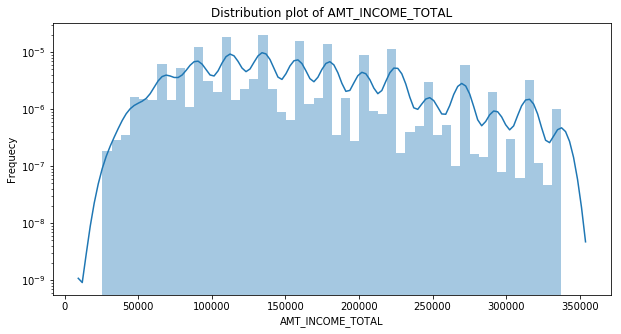

In [97]:
#Plotting Distribution Plot
#Settting figure size
plt.figure(figsize=(10,5))
#Plotting
sns.distplot(df.loc[:,["AMT_INCOME_TOTAL"]].dropna())
#Setting x,y labels adn Titleof chart
plt.xlabel("AMT_INCOME_TOTAL")
plt.ylabel("Frequecy")
plt.title("Distribution plot of AMT_INCOME_TOTAL")
#Setting yscale to log
plt.yscale("log")
plt.show()

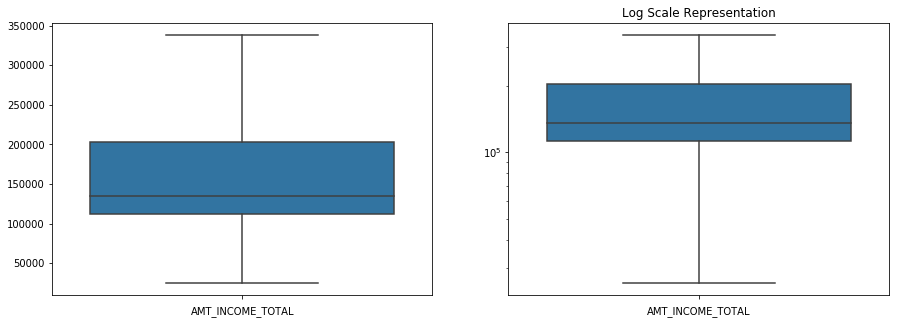

In [98]:
#Plotting box plot
uniboxplot(df.loc[:,["AMT_INCOME_TOTAL"]])

In [99]:
#Peek at data
df.loc[:,["AMT_INCOME_TOTAL"]].describe()

,AMT_INCOME_TOTAL
count,293476.000000
mean,154263.935956
std,64014.949755
min,25650.000000
25%,112500.000000
50%,135000.000000
75%,202500.000000
max,337500.000000


<h3>Insights</h3>
<ul>
    <li>The Distribution plot did not provide much insight but we can say that for income less than 50,000 and greater than 3,40,000 the frequency is low(it drops).For all other values there is a continuous increase and decrease in frequency levels.</li><li>From box plot we saw that majority of the population income lies between 1,00,000 and 2,00,000</li>
    <li>Minimum value is 25,650 and maximum value is 3,37.500. We can also estimate these values from the boxplot shown above.</li>
    </ul>

<b>Univariate Analysis on column AMT_CREDIT

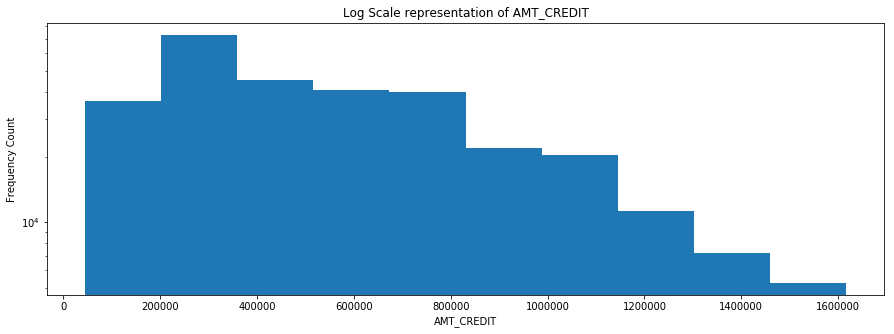

In [100]:
#Plotting chart to see data distribution
plt.figure(figsize=(15,5))
#plotting histogram
plt.hist(df.loc[:,"AMT_CREDIT"].dropna())
#Setting x,y labels and Title
plt.xlabel("AMT_CREDIT")
plt.ylabel("Frequency Count")
plt.title("Log Scale representation of AMT_CREDIT")
#Setting yscale to log
plt.yscale("log")

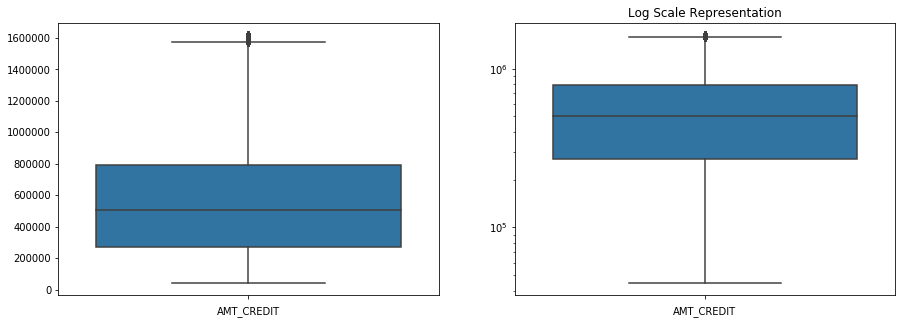

In [101]:
#plotting Box plot
uniboxplot(df.loc[:,["AMT_CREDIT"]])

In [102]:
#peek at data
df.loc[:,"AMT_CREDIT"].describe()

count    3.009490e+05
mean     5.699786e+05
std      3.527292e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.056650e+05
75%      7.908300e+05
max      1.616278e+06
Name: AMT_CREDIT, dtype: float64

<h3>Insights</h3>
<ul>
    <li>The bar plot suggest that AMT_CREDIT follow power law after 4,00,000.This suggest frequency distribution after 4,00,000 follows a geometric progression.</li>
    <li>Minimum value is 45000 and maximum value is 1570000. We can also estimate these values from the boxplot shown above.</li><li>Box plot suggest that most of the values of AMT_CREDIT are concentrated between 2,00,000 and 8,00,000</li>
    </ul>

<b>Univariate Analysis on column AMT_ANNUITY

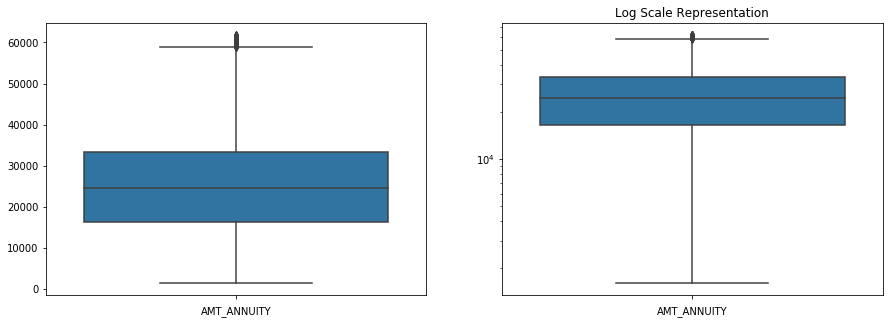

In [103]:
#Checking data distribution and outliers
uniboxplot(df.loc[:,["AMT_ANNUITY"]])

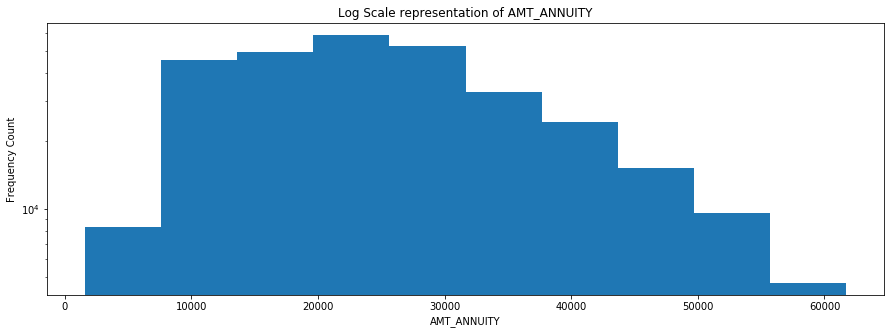

In [104]:
#plotting chart to see data distribtuion
#Setting figure size
plt.figure(figsize=(15,5))
#plotting histrogram
plt.hist(df.loc[:,"AMT_ANNUITY"].dropna())
#Setting xlabel ,ylabel and title
plt.xlabel("AMT_ANNUITY")
plt.ylabel("Frequency Count")
plt.title("Log Scale representation of AMT_ANNUITY")
#Setting yscale to log
plt.yscale("log")

In [105]:
#Peek at data description
df.loc[:,"AMT_ANNUITY"].describe()

count    299995.000000
mean      25924.594397
std       12229.934543
min        1615.500000
25%       16359.750000
50%       24543.000000
75%       33408.000000
max       61699.500000
Name: AMT_ANNUITY, dtype: float64

<h3>Insights</h3>
<ul>
    <li>The bar plot suggest that AMT_ANNUITY follow power law after 30,000.This suggest frequency distribution after 30,000 follows a geometric progression.</li>
    <li>Minimum value is 1615 and maximum value is 61699. We can also estimate these values from the boxplot shown above.</li><li>Box plot suggest that most of the values of AMT_ANNUITY are concentrated between 16,000 and 33,000</li>
    </ul>

<b>Univariate Analysis on column AMT_GOODS_PRICE

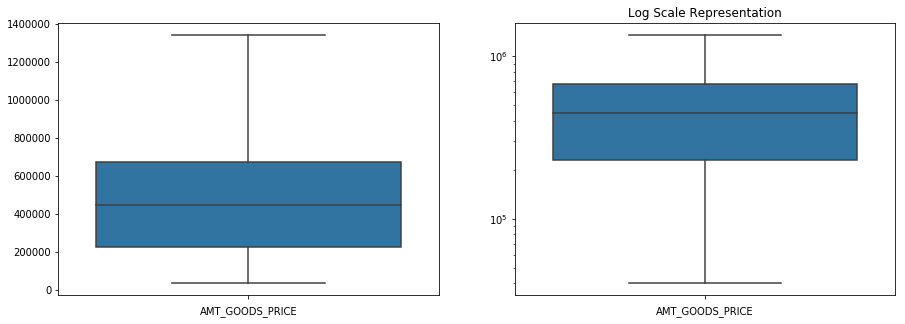

In [106]:
#Checking data distribution and outliers
uniboxplot(df.loc[:,["AMT_GOODS_PRICE"]])

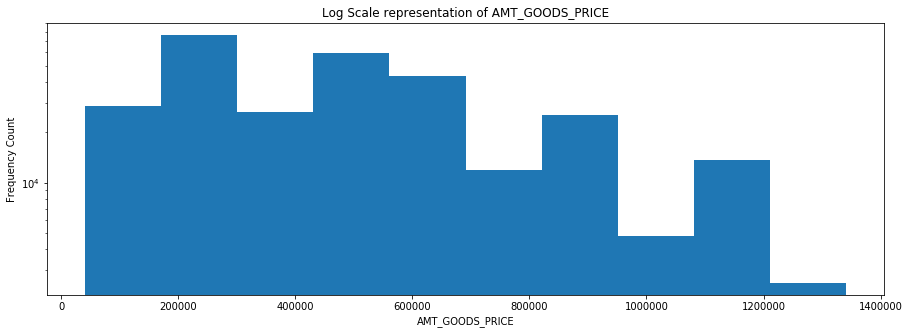

In [107]:
#Plotting data to see its distribution
#setting figure size
plt.figure(figsize=(15,5))
plt.hist(df.loc[:,"AMT_GOODS_PRICE"].dropna())
#Setting xlabel,ylabel,Title
plt.xlabel("AMT_GOODS_PRICE")
plt.ylabel("Frequency Count")
plt.title("Log Scale representation of AMT_GOODS_PRICE")
#Setting y scale to log
plt.yscale("log")

In [108]:
df.loc[:,"AMT_GOODS_PRICE"].describe()

count    2.925050e+05
mean     4.869864e+05
std      2.905753e+05
min      4.050000e+04
25%      2.295000e+05
50%      4.500000e+05
75%      6.750000e+05
max      1.341000e+06
Name: AMT_GOODS_PRICE, dtype: float64

<h3>Insights</h3>
<ul>
    <li>The bar plot does not provide much insight but wecan say frequency distribution between 2,00,000 and 4,00,000 is highest.</li>
    <li>Minimum value is 40500 and maximum value is 13,41,000. We can also estimate these values from the boxplot shown above.</li><li>Box plot suggest that most of the values of AMT_GOODS_PRICE are concentrated between 2,00,000 and 7,00,000</li>
    </ul>

<b>Univariate Analysis on column AGE

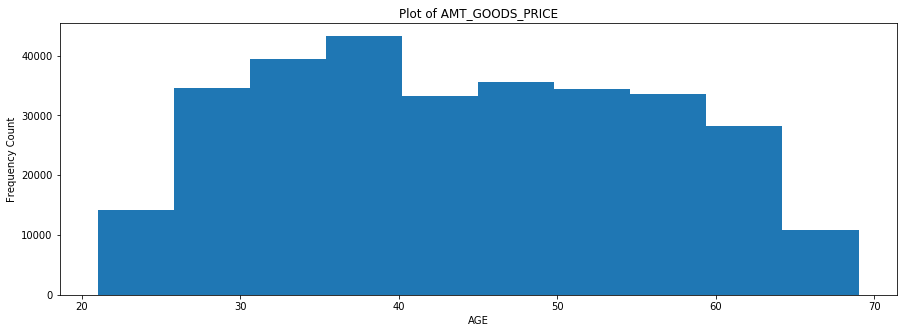

In [109]:
#Plotting histogram to see data distribution
#Setting figure size
plt.figure(figsize=(15,5))
#Plot
plt.hist(df.loc[:,"AGE"].dropna())
#Setting xlabe,ylabel and title
plt.xlabel("AGE")
plt.ylabel("Frequency Count")
plt.title("Plot of AMT_GOODS_PRICE")
plt.show()

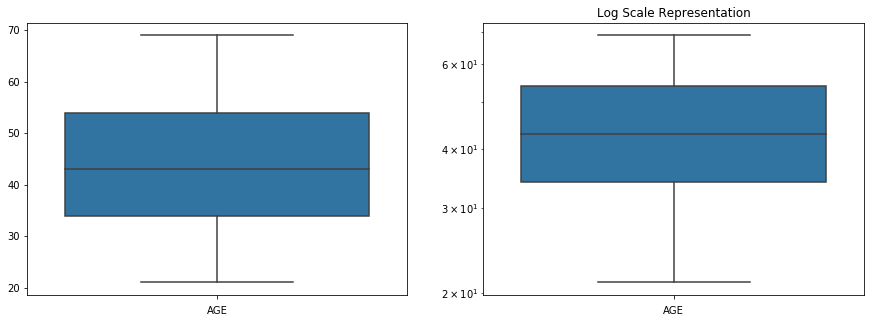

In [110]:
#Checking data distribution and outliers
uniboxplot(df.loc[:,["AGE"]])

In [111]:
df.loc[:,["AGE"]].describe()

,AGE
count,307511.000000
mean,43.938646
std,11.964047
min,21.000000
25%,34.000000
50%,43.000000
75%,54.000000
max,69.000000


<h3>Insights</h3> 
<ul>
    <li>The distribution suggest that maximum frequency is of AGE between 35 to 40 and minimum frequency is of AGE 65 to 70</li>
    <li>Box plot suggest that most of the people in our data have age between 35 to 55</li>
    <li>Minimum age of customer in our data is 21 and maximum is 69</li>
    </ul>

<h3>Univariate Analysis on Categorical Columns

<b>Note</b><br>
We have observed that most of the data here is skewed but for the purpose of analysis we are ignoring that and we are drawing our inferences based on the given data

<b>Analysing Column NAME_CONTRACT_TYPE

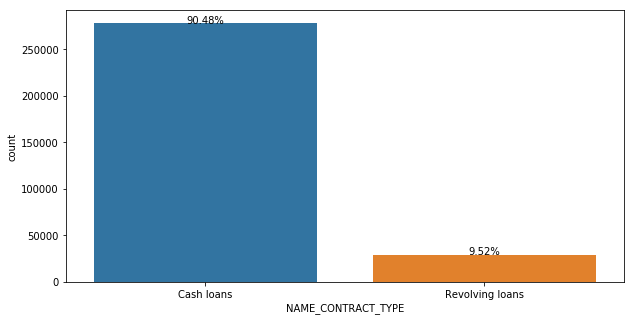

In [112]:
#Plotting countplot of column to see data distribution
unicountplot(df.loc[:,"NAME_CONTRACT_TYPE"])

90% of people in our data have applied for cash loans whereas only 10% applied for Revolving loans

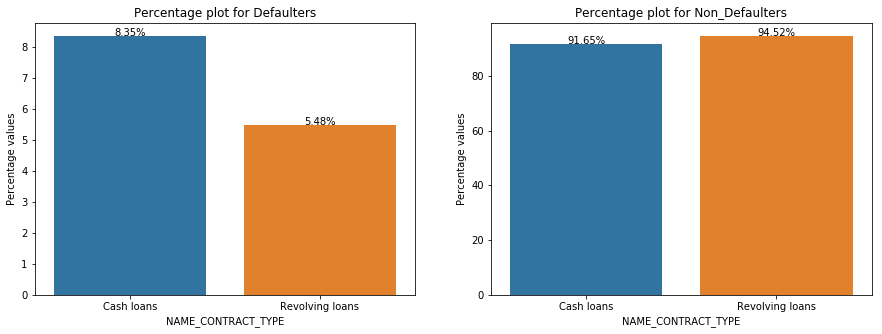

In [113]:
#Doing a categorical analysis on NAME_CONTRACT_TYPE after dividing it based on target variable
catanalysis(df,"NAME_CONTRACT_TYPE")

<h3>Observations</h3>
<ol><li>5.48% of revolving loans are defaulted.</li><li>8.35% of people who take cash loans default on their loans.</li></ol>

<h3>Conclusions</h3>
<ol><li>Default Percentage of cash loans is higher than revolving loans.</li><li>The data suggests that granting cash loans to customers involves higher risk then granting them revolving loans</li><li>The data supports our understanding that revolving loans are less risky because of the flexibility they provide to the customer.</li></ol>

<b>Analysis on CODE_GENDER

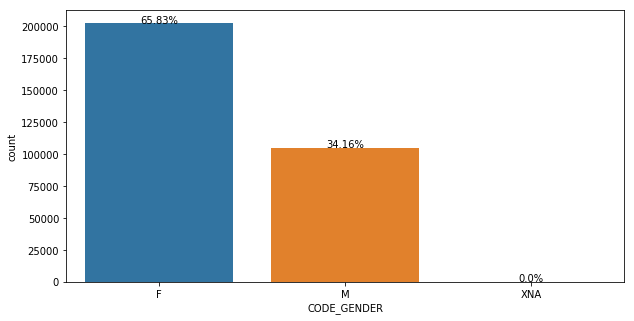

In [114]:
#Plotting a countplot to see data distribution
unicountplot(df.loc[:,"CODE_GENDER"])

66% of people in our data  is about females and only 34% is about male customes.This can result in some biased/skewed analysis

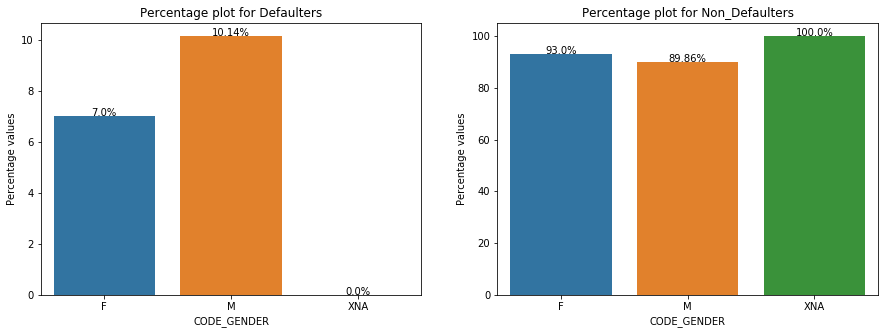

In [115]:
#Plotting CODE_GENDER
catanalysis(df,"CODE_GENDER")

<h3>Observations and Conclusions</h3>
<ol><li>7% females are defaulters</li><li>10% males are defaulters</li><li>93% females are Non Defaulters</li><li>89.86% males are Non Defaulters.<li>From the above graph we can say that females are more likely to default than men.</li></ol>

<h3>Conclusions</h3>
<ol><li>From the above graph we can say that Males are more likely to default than Females.</li></ol>

 <b>Analysis on AGE_CAT

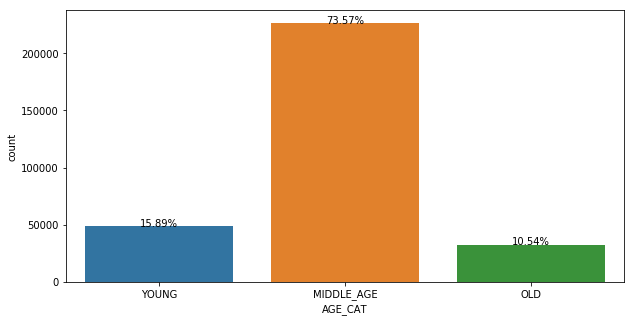

In [116]:
#Plotting a countplot of AGE_CAT column
unicountplot(df.loc[:,"AGE_CAT"])

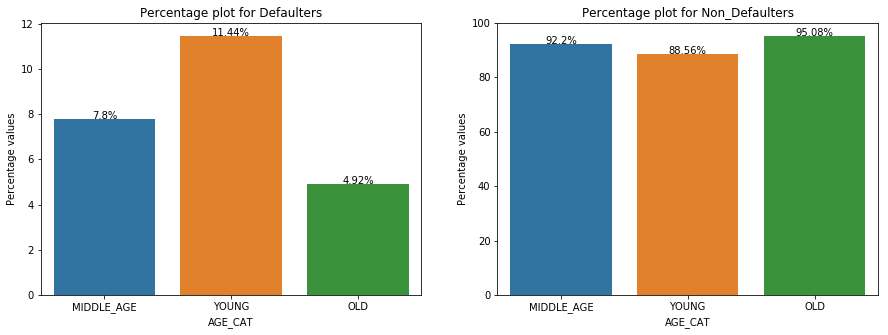

In [117]:
#plotting AGE_CAT after dividing population based on target variables
catanalysis(df,"AGE_CAT")

<h3>Observations</h3>
<ol><li>11% of young people default on their loans</li><li>8% of Middle aged people default on their loans</li><li>Only 5 % of old people default on their loans</li></ol>

<h3>Conclusion</h3>
<ol><li>Young people (people with age less than 30) are more likely to default on their loans</li><li>Middle age people and old people are very less likely to default.</li><li>Among all the categories it is safest to give loan to old people</li><li>The data opposed our initial thinking that young people are less likely to default.We predicated this thought on the premise that young people have a steady job and thus are likely tom pay their loans.</li><li>As age increases risk associated wth defaulting on loan decreases</li></ol>

<b>Analysis on NAME_EDUCATION_TYPE

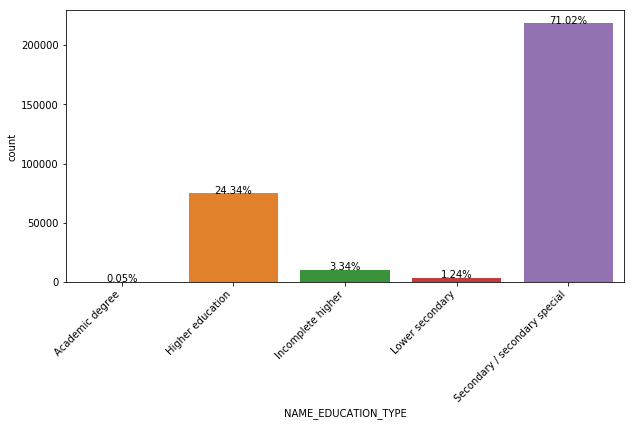

In [118]:
#Frequency plot of NAME_EDUCATION
unicountplot(df.loc[:,"NAME_EDUCATION_TYPE"],1)

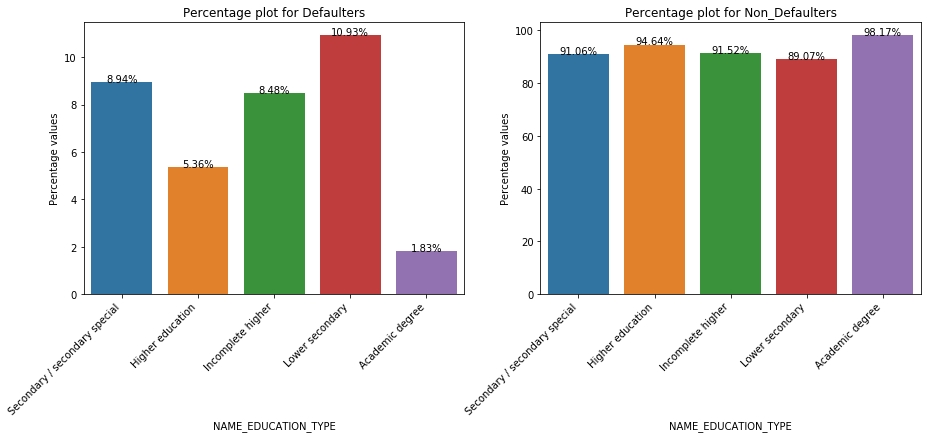

In [119]:
catanalysis(df,"NAME_EDUCATION_TYPE",1)

<h3>Observations</h3>
<ol><li>People wtih lower secondry degree are most defaulting on their loans aroung 10.9%</li><li>Only 5% of people with higher education default on their loans</li><li>8% of people with secondry or incomplete higher degree default on their loans</li></ol>

<h3>Conclusions</h3>
<ol><li>Level of education is highly corelated with people defaulting on their loans.</li><li>People who are less educated are more likely to default on their loans.</li><li>People with higher education,holding academic degrees are less likely to default on their loans.</li><li>It is safest to give loans to people who have academic degrees.</li><li>The data supports our understanding that people who are educated tend to live a very stable lifestyle and thus are less likely to default on their loans.</li></ol>

<b>Analysing Column FINANCIAL_CAT

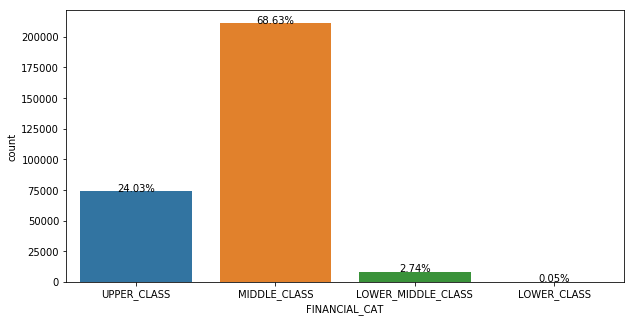

In [120]:
#Count plot of FINANCIAL_CAT
unicountplot(df.loc[:,"FINANCIAL_CAT"])

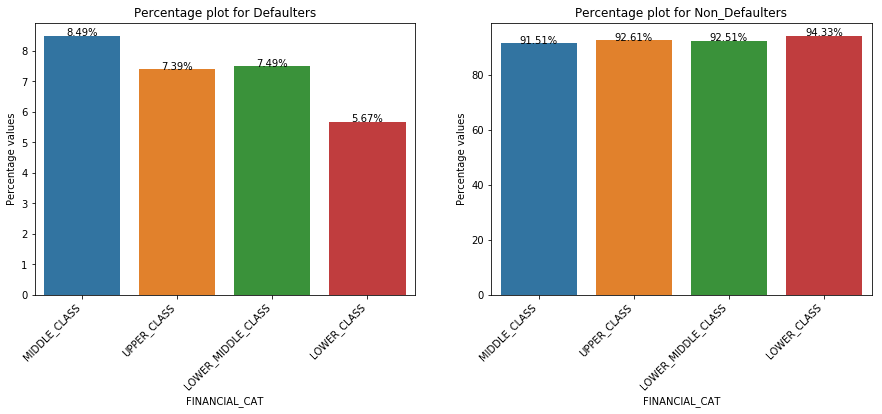

In [121]:
#Plot of FINANCIAL_CAT based on target variables
catanalysis(df,"FINANCIAL_CAT",1)

<h3>Observations</h3>
<ol><li>Only 6% of LOWER_CLASS people default on their loans</li><li>7.5% of people belonging to UPPER and LOWER_MIDDLE class  default on their loans</li><li>8% of MIDDLE class people default on their loans</li></ol>

<h3>Conclusions</h3>
<ol><li>LOWER_CLASS people are less likely to default on their loans.</li><li>MIDDLE_CLASS people are more likely to default on their loans.</li><li>The data does not support our initial thinking.We thought that people who are earning more are less likely to default on their loans.Contrary to our belief people with low income are more safer to provide loans than people with high income.</li><li>Their is no significant difference between financial status and Target variable.It is true that their is some difference between defaulter % across various categories but it is not large enough.</li><li>We conclude that all classes of people more or less are equally likely to default on their loans.</li></ol>

<b>Analysing column NAME_FAMILY_STATUS

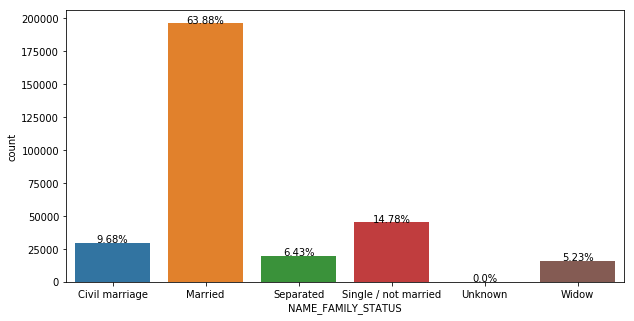

In [122]:
#Count plot of NAME_FAMILY_STATUS
unicountplot(df.loc[:,"NAME_FAMILY_STATUS"])

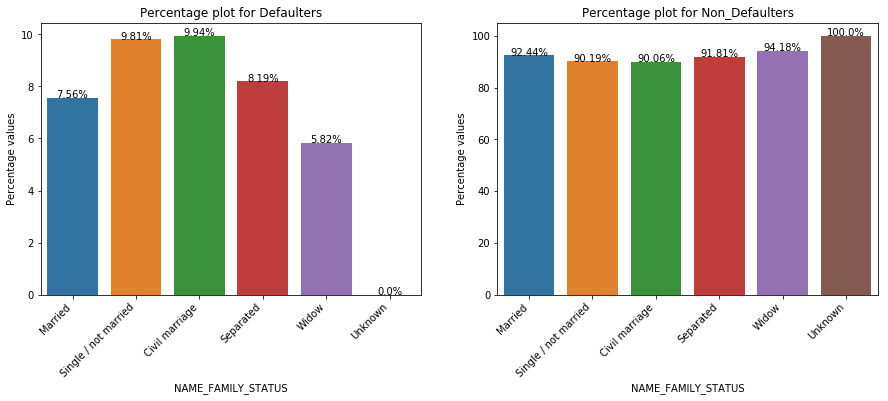

In [123]:
#Plot of NAME_FAMILY_STATUS after dividing based on target variable
catanalysis(df,"NAME_FAMILY_STATUS",1)

<h3>Observations</h3>
<ol><li>8% of people who are married or separated default on their loans.</li><li>10% of people who are single or have civil marriage default on their loans.</li><li>5.82% of people who are widow are defaulters. </li></ol>

<h3>Conclusions</h3>
<ol><li>People who are widow are comparetively safe to give loans as only 5% of them default on their loans.</li><li>People who are single or have done civil marriage are statistically high risk customers and thus providing them loan is a risky endeavour.</li><li>The data somewhat supports our notion that married people are not risk takers when compared to Single people and thus are lesslikely to default.</li><li>We cannot say that FAMILY_STATUS of people is a significant factor and it affects the target variable to a great degree but their is some corelation which can be further exploited by grouping this data with other variables.</li></ol>

<h3>Correlation on Numeric Columns

In [124]:
#Contains a list of numeric columns which we deemed important based on our understanding od data
numcol=[
"AMT_INCOME_TOTAL",
"AMT_CREDIT",
"AMT_ANNUITY",
"AMT_GOODS_PRICE",
"DAYS_BIRTH",
"OBS_60_CNT_SOCIAL_CIRCLE",
"DEF_60_CNT_SOCIAL_CIRCLE",
"AMT_REQ_CREDIT_BUREAU_QRT"]

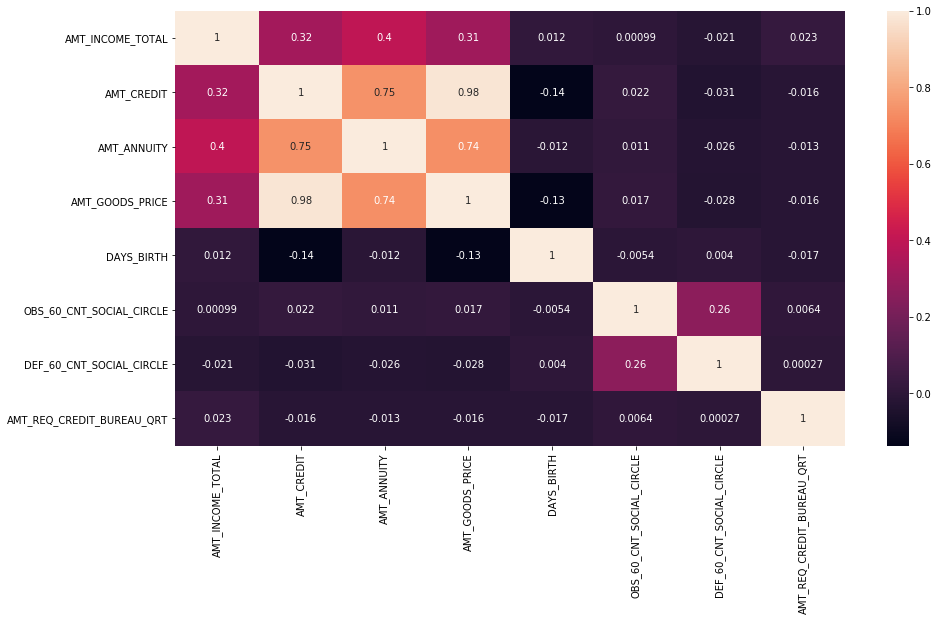

In [125]:
#Correlation for Defaulter
plt.figure(figsize=(15,8))
sns.heatmap(dfdefault.loc[:,numcol].corr(),annot=True)
plt.show()

<h3>Observations</h3>
<ol><li>AMT_CREDIT and AMT_GOODS_PRICE are highly positive correlated with correlation 0.98</li><li>AMT_CREDIT and DAYS_BIRTH are negativily correlated with correlation -0.14</li><li>Top 5 positivily correlated columns in decreasing order: <br>
AMT_CREDIT and AMT_GOODS_PRICE <br>AMT_CREDIT and AMT_ANNUITY<br>AMT_CREDIT and AMT_INCOME_TOTAL<br>AMT_ANNUITY and AMT_GOODS_PRICE<br>AMT_ANNUITY and AMT_INCOME_TOTAL<br></li><li>Top 5 negativily correlated columns in decreasing order: <br>AMT_CREDIT and DAYS_BIRTH<br>AMT_GOODS_PRICE and DAYS_BIRTH<br>DEF_60_CNT_SOCIAL_CIRCLE and AMT_CREDIT<br>DEF_60_CNT_SOCIAL_CIRCLE and AMT_GOODS_PRICE<br>DEF_60_CNT_SOCIAL_CIRCLE and AMT_ANNUITY

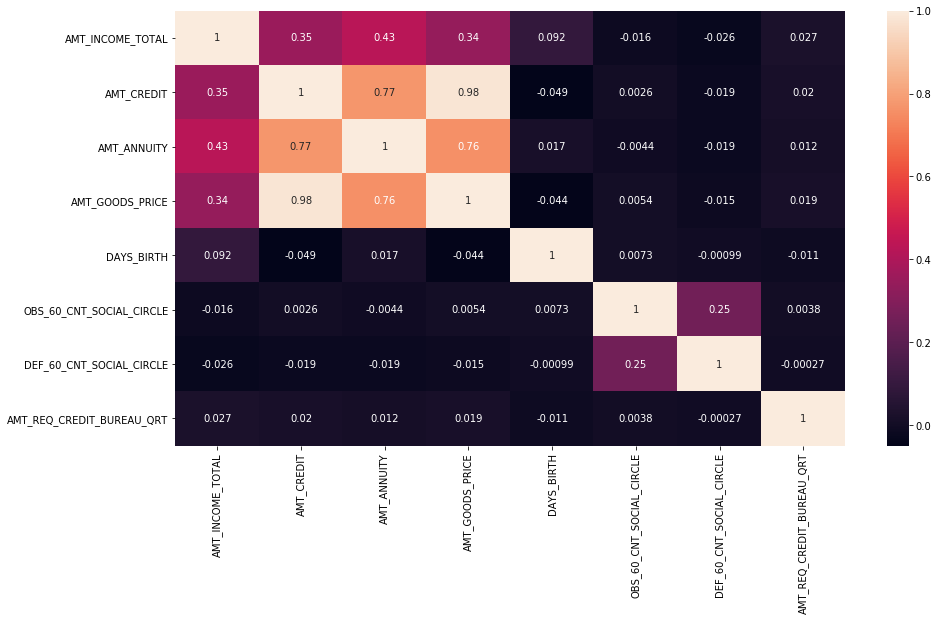

In [126]:
#Correlation for Non Defaulter
plt.figure(figsize=(15,8))
sns.heatmap(dfnotdefault.loc[:,numcol].corr(),annot=True)
plt.show()

<h3>Observations</h3>
<ol><li>AMT_CREDIT and AMT_GOODS_PRICE are highly positive correlated with correlation 0.98</li><li>AMT_CREDIT and DAYS_BIRTH are negativily correlated with correlation -0.049</li><li>Top 5 positivily correlated columns in decreasing order: <br>
AMT_CREDIT and AMT_GOODS_PRICE <br>AMT_CREDIT and AMT_ANNUITY<br>AMT_ANNUITY and AMT_GOODS_PRICE<br>AMT_ANNUITY and AMT_INCOME_TOTAL<br>AMT_CREDIT and AMT_INCOME_TOTAL<br></li><li>Top 5 negativily correlated columns in decreasing order: <br>AMT_CREDIT and DAYS_BIRTH<br>AMT_GOODS_PRICE and DAYS_BIRTH<br>DEF_60_CNT_SOCIAL_CIRCLE and AMT_INCOME_TOTAL<br>DEF_60_CNT_SOCIAL_CIRCLE and AMT_CREDIT<br>DEF_60_CNT_SOCIAL_CIRCLE and AMT_ANNUITY

<h3>Conclusion</h3>
<ol><li>Top 5 positivity correlated column pairs are same in defaulter and non defaulter case but the the order of correlation is not same. </li><li>Top 5 negativily correlated column pairs are not same in defaulter and non defaulter case  

<h2>Bivariate Analysis(Categorical Columns)

Till now we have made some conclusions considering a single categorical variable and comparing it with respect to Target variable.Now we will take it a step further and see how combination of two categorical variables affect the target variables.We will draw inferences taking two cases.

<b>Example 1: Columns involved CODE_GENDER,NAME_EDUCATION_STATUS</b>
<ul><li>For CODE_GENDER we observed that male customers are more likely to default than females.</li><li>For NAME_EDUCATION_STATUS we observed that education level has impact on target variable.More educated people are less prone to  defaulting on their loans.</li><li>We will now see if we observe the similar trend when we divide people based on gender.</li></ul>

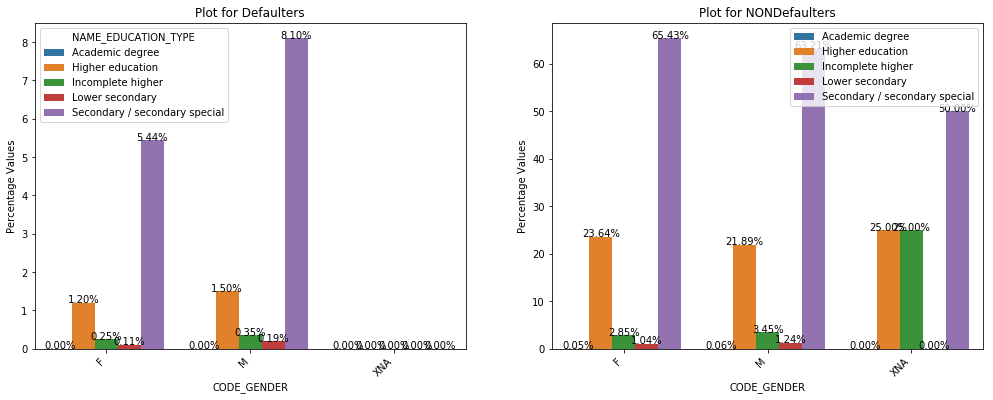

In [127]:
#Plotting two charts one for defaulters and other for non defaulters
#Setting figure size
plt.figure(figsize=(17,6))
#Setting subplot
plt.subplot(1,2,1)
#Function to plot required data
bicatanalysis(dfdefault,"CODE_GENDER","NAME_EDUCATION_TYPE","Defaulters")
#Setting subplot
plt.subplot(1,2,2)
#Function to plot required data .Hera we are plotting for non defaulters
bicatanalysis(dfnotdefault,"CODE_GENDER","NAME_EDUCATION_TYPE","NONDefaulters")
plt.legend(loc=("upper right"))

<h3>Observations</h3>
<ul><li>Earlier we saw that people with less education are more prone to defaulting their loans and males are more likely to default than females</li><li>Among Females who defaulted on their loans 82% (5/7 )have secondary education </li><li>Among males who defaulted 80% (8/10) of them have secondary education</li></ul> 

<h3>Conclusion</h3>
<ul><li>The chart still supports our understanding that people who are highly educated are less prone to defaulting on their loans. This is evident from the fact that no person who has an academic degree defaulted. 
</li><li>If we see overall than people with low education leveldefault more and people with high education level default less.However among dividing people in males and females this trend is not always true.</li><li>People with secondary education defies this trend.Both males and females who have secondary education show unusually high percentage in both defaulting and non defaulting.</li><li>For all other education levels our observation still holds true.If we observe the Non_defaulters chart it can be seen that for both males and females categories that people with higher education do not default(Except for the unusual trend seen in secondary education) </li></ul>

<b>Example 2: Columns involved AGE_CAT,NAME_CONTRACT_TYPE</b>
<ul><li>For AGE_CAT we observed that Young people are more likely to default than old people.</li><li>For NAME_CONTRACT_TYPE we observed that revolving loans are less likely to get defaulted than cash loans</li></ul>

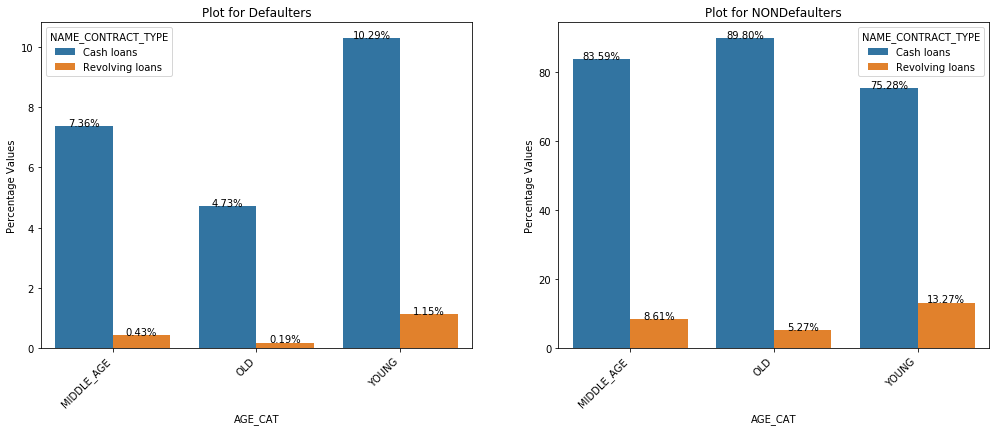

In [128]:
#Plotting charts for bivariate analysis one for defauters and other for non defaulters
#Setting figure size
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)
#Chart for defaulters.First defaulters willbe classified as male and female
#then those categories will be classified based on NAME_CONTRACT_TYPE
bicatanalysis(dfdefault,"AGE_CAT","NAME_CONTRACT_TYPE","Defaulters")
plt.subplot(1,2,2)
#Chart for nondefaulters.First defaulters willbe classified as male and female
#then those categories will be classified based on NAME_CONTRACT_TYPE
bicatanalysis(dfnotdefault,"AGE_CAT","NAME_CONTRACT_TYPE","NONDefaulters")


<h3>Observation</h3>
<ul><li>8% of middle aged people were defaulters.7% of total middle age people defaulted on cash loans</li><li>5% of old people were defaulters.4% of the total old people defaulted on cash loans.</li><li>11% of young people defaulted on their loans,among those 10% were cash loan defaulters. </li></ul>

<h3>Conclusion</h3>
<ul><li>The chart supports our initial understanding that old people are less likely to default.If we observe the chart on the right we will observe that 90% of old people paid back their cash loans and 5.27% paid back their revolving loans.So if a person is old and is asking for cash loan he is very likely to pay it back so bank should approve it.</li><li>Similar trend is observed in middle aged people.83% of total middle aged people paid back their cash loan and 9% of middle age people paid back their revolving loan thus only 8% of middle aged people defaulted on their loans.</li><li>Upon further observation we conclude that if a person id middle aged and is asking for revolving loan he is likely to pay it back.But if he is asking for cash loan their is some risk associated with it</li><li>For young people we saw that 85% (75+10) of them have cash loans.10% of total young people defaulted on cash loan whereas 75% paid them. </li><li>For young people we saw that there is 1 in 14 aprox 7% chance that they will default on revolving loans whereas there is 10 in 85 approx 11.76% chance that they will default on cash loans so we conclude that providing revolving loans to young people is a less risky endeavour</li></ul>